<a href="https://colab.research.google.com/github/gyeongdong13/Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D(%EC%83%88%EB%A1%9C%EC%9A%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


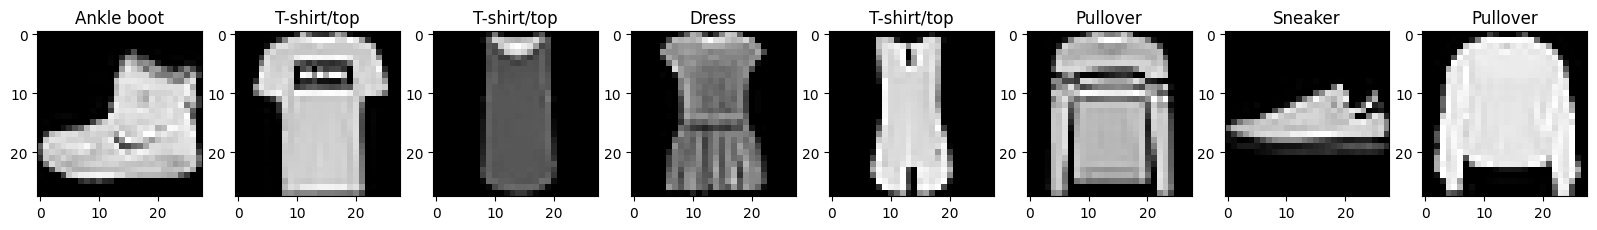

In [ ]:
import numpy as np               #배열계산 패키지
import matplotlib.pyplot as plt  #시각화 패키지

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

ncols = 8

figure, axs = plt.subplots(figsize=(20, 8), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(train_images[:8][i], cmap='gray')
    axs[i].set_title(class_names[train_labels[:8][i]])

In [ ]:
train_images[0].shape

(28, 28)

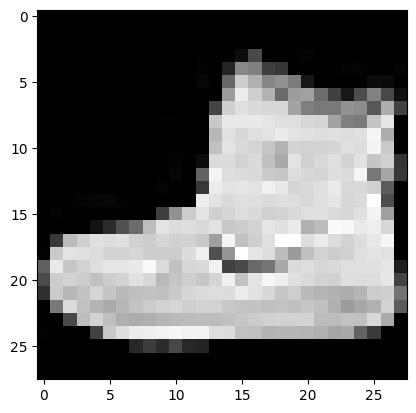

In [ ]:
# 2차월 배열을 흰색과 검은색으로 표현하여 시각화할 수 있음

plt.imshow(train_images[0], cmap='gray')

In [ ]:
# 이미지 값 변환
train_images = np.array(train_images/255.0, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)

# 라벨 값 변환
train_labels = np.array(train_labels, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels_2 = to_categorical(train_labels)
test_labels_2 = to_categorical(test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels_2, test_size=0.3, random_state=1)

train_x.shape, val_x.shape, train_y.shape, val_y.shape

((42000, 28, 28), (18000, 28, 28), (42000, 10), (18000, 10))

In [ ]:
from tensorflow.keras.layers import Dense      # 완전연결층 => 가장 기본적인 딥러닝 층
from tensorflow.keras.layers import Flatten    # 평탄화층   => ANN 구조에 맞게 변환하기 위한 층
from tensorflow.keras.models import Sequential # Keras 패키지의 Model 생성 함수

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = ([28, 28]))) #MNIST 이미지 구조를 평탄화 : (28 * 28) -> (784) -> 입력 노드의 수
model.add(Dense(256, activation = 'relu'))    #첫번째 은닉층 노드의 수를 256개로 설정, 활성화함수는 relu 사용
model.add(Dense(128, activation = 'relu'))    #두번째 은닉층 노드의 수를 128개로 설정, 활성화함수는 relu 사용
model.add(Dense(64, activation = 'relu'))    #두번째 은닉층 노드의 수를 64개로 설정, 활성화함수는 relu 사용
model.add(Dense(10, activation = 'softmax')) #출력층 노드의 수는 Y의 카테고리 수와 맞추어준다 !


# model.add(Dense(1, activation = 'sigmoid')) # 이진 분류인 경우

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
# ANN 모델에 손실함수와 최적화함수를 설정하는 방법은 compile 함수를 이용하면 된다.

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               200960    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 10)                650       
                                                                 
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 5
batch_size = 32 #주로 2의 배수로 선정함

history = model.fit(x=train_x, y=train_y, batch_size=batch_size, validation_data=(val_x, val_y),
                    epochs=epochs, verbose=1)

Epoch 1/5
1313/1313 [==============================] - 11s 8ms/step - loss: 0.5240 - accuracy: 0.8119 - val_loss: 0.4031 - val_accuracy: 0.8528
Epoch 2/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.3814 - accuracy: 0.8613 - val_loss: 0.3746 - val_accuracy: 0.8606
Epoch 3/5
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3482 - accuracy: 0.8695 - val_loss: 0.3392 - val_accuracy: 0.8766
Epoch 4/5
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3200 - accuracy: 0.8818 - val_loss: 0.3275 - val_accuracy: 0.8789
Epoch 5/5
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2982 - accuracy: 0.8887 - val_loss: 0.3254 - val_accuracy: 0.8793


In [ ]:
model.evaluate(test_images, test_labels_2, verbose=0)

[0.43327242136001587, 0.8373000025749207]

In [ ]:
#예측한 값과 실제값 눈으로 비교

pred_y=model.predict(test_images).argmax(axis=1)
print(pred_y[:10])
print(test_labels[:10])

313/313 [==============================] - 2s 6ms/step
[9 2 1 1 6 1 4 6 5 7]
[9. 2. 1. 1. 6. 1. 4. 6. 5. 7.]


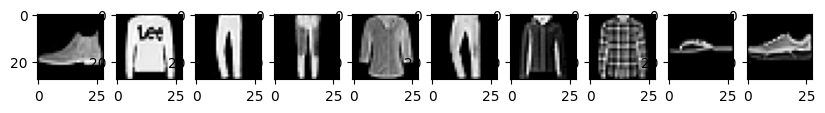

In [ ]:
# 여러개의 그림을 한번에 표현하기

ncols = 10

figure, axs = plt.subplots(figsize=(10, 10), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(test_images[:10][i], cmap='gray')